In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Read the data
cars = pd.read_csv("/content/50_Startups.csv", encoding= 'unicode_escape' )
cars.head()

,rd_spend,adminstration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rd_spend         50 non-null     float64
 1   adminstration    50 non-null     float64
 2   marketing_spend  50 non-null     float64
 3   state            50 non-null     object 
 4   profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#check for missing values
cars.isna().sum()

rd_spend           0
adminstration      0
marketing_spend    0
state              0
profit             0
dtype: int64

# Correlation Matrix

In [6]:
cars.corr()

,rd_spend,adminstration,marketing_spend,profit
rd_spend,1.000000,0.241955,0.724248,0.972900
adminstration,0.241955,1.000000,-0.032154,0.200717
marketing_spend,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

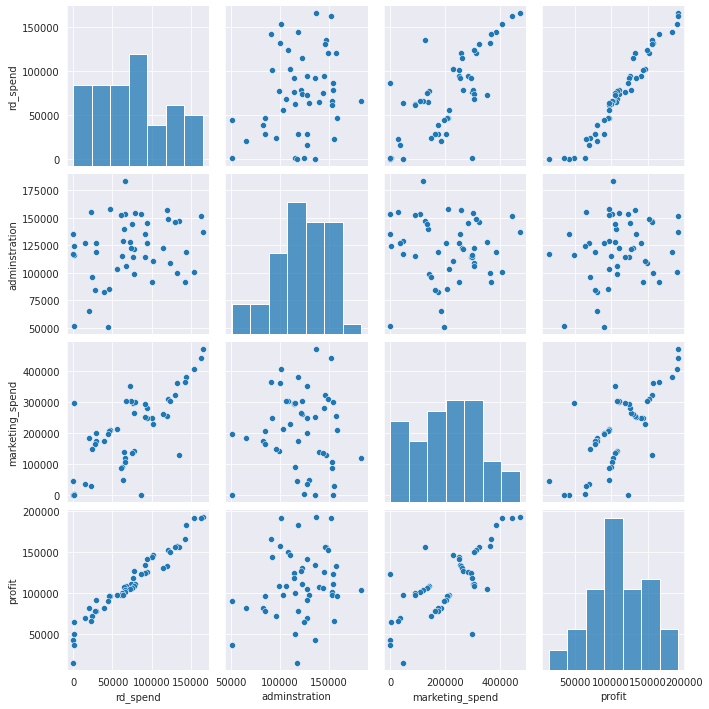

In [7]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Preparing a model

In [8]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('profit~rd_spend+adminstration+state+marketing_spend',data=cars).fit()

In [9]:
#Coefficients
model.params

Intercept            50125.343832
state[T.Florida]       198.788793
state[T.New York]      -41.887019
rd_spend                 0.806023
adminstration           -0.027004
marketing_spend          0.026980
dtype: float64

In [10]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept             7.280560
state[T.Florida]      0.058970
state[T.New York]    -0.012864
rd_spend             17.368580
adminstration        -0.517012
marketing_spend       1.573889
dtype: float64 
 Intercept            4.444178e-09
state[T.Florida]     9.532429e-01
state[T.New York]    9.897941e-01
rd_spend             2.578772e-21
adminstration        6.077373e-01
marketing_spend      1.226769e-01
dtype: float64


In [11]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

# Simple Linear Regression Models

In [12]:
ml_v=smf.ols('profit~adminstration',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept        3.040044
adminstration    1.419493
dtype: float64 
 Intercept        0.003824
adminstration    0.162217
dtype: float64


In [13]:
ml_w=smf.ols('profit~rd_spend',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    19.320288
rd_spend     29.151139
dtype: float64 
 Intercept    2.782697e-24
rd_spend     3.500322e-32
dtype: float64


In [14]:
ml_wv=smf.ols('profit~rd_spend+adminstration',data = cars).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept         9.122352
rd_spend         28.588870
adminstration    -1.072677
dtype: float64 
 Intercept        5.695336e-12
rd_spend         2.278348e-31
adminstration    2.888932e-01
dtype: float64


# Calculating VIF

In [15]:
rsq_marketing_spend = smf.ols('marketing_spend~rd_spend+adminstration+profit',data=cars).fit().rsquared  
vif_marketing_spend = 1/(1-rsq_marketing_spend) # 16.33

rsq_rd_spend = smf.ols('rd_spend~marketing_spend+adminstration+profit',data=cars).fit().rsquared  
vif_rd_spend = 1/(1-rsq_rd_spend) # 564.98

rsq_adminstration = smf.ols('adminstration~rd_spend+profit+marketing_spend',data=cars).fit().rsquared  
vif_adminstration = 1/(1-rsq_adminstration) #  564.84

rsq_profit = smf.ols('profit~adminstration+marketing_spend+rd_spend',data=cars).fit().rsquared     
vif_profit = 1/(1-rsq_profit) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['marketing_spend','rd_spend','adminstration','profit'],'VIF':[vif_marketing_spend,vif_rd_spend,vif_adminstration,vif_profit]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,marketing_spend,2.465332
1,rd_spend,19.563001
2,adminstration,1.182146
3,profit,20.302917


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

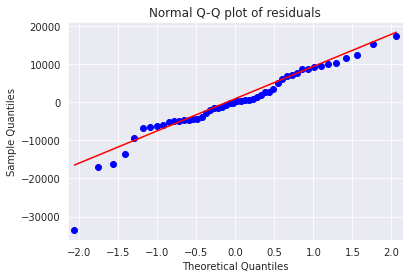

In [16]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [17]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45])]

## Residual Plot for Homoscedasticity

In [18]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

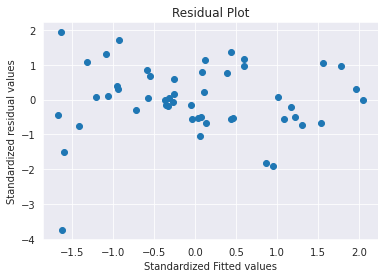

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

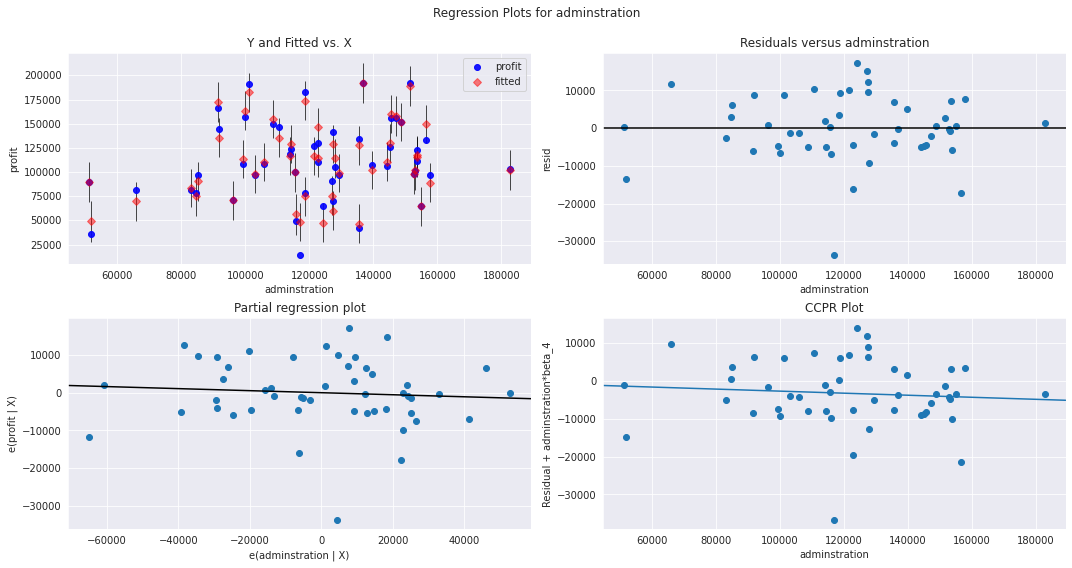

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "adminstration", fig=fig)
plt.show()

In [62]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "state", fig=fig)
plt.show()

ValueError: ignored

<Figure size 1080x576 with 0 Axes>

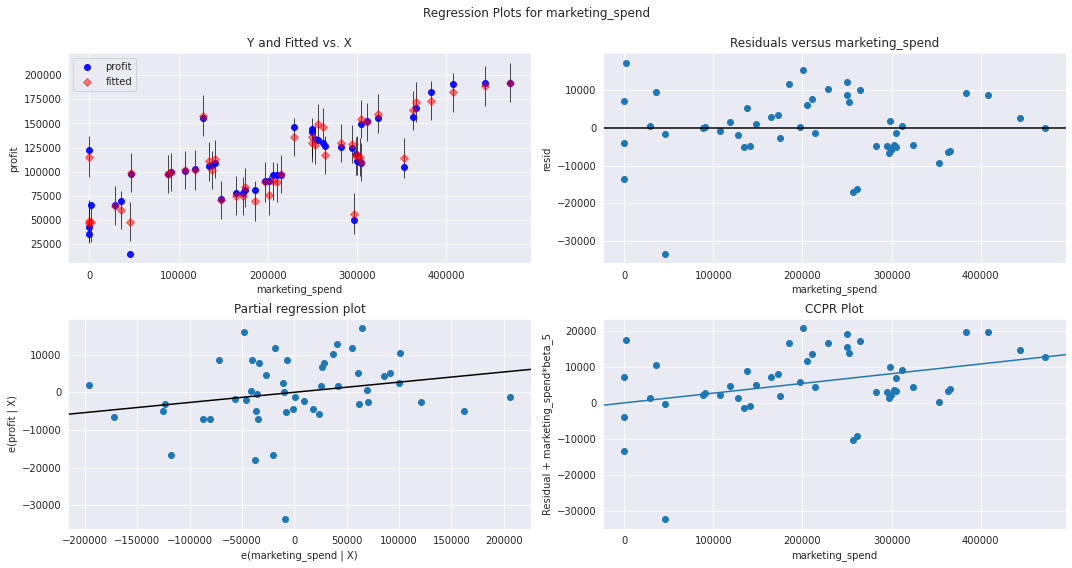

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "marketing_spend", fig=fig)
plt.show()

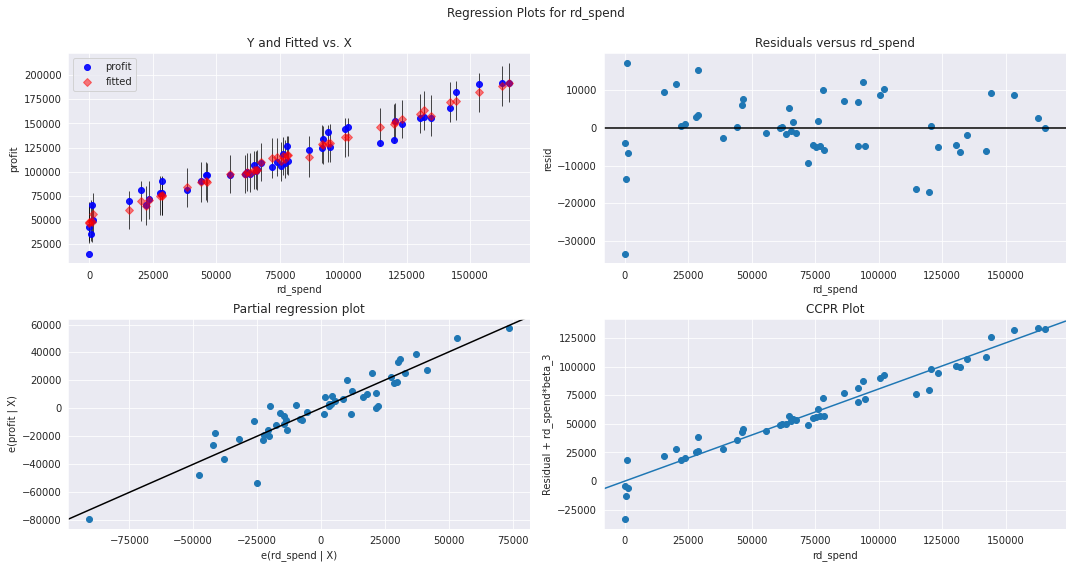

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rd_spend", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [24]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


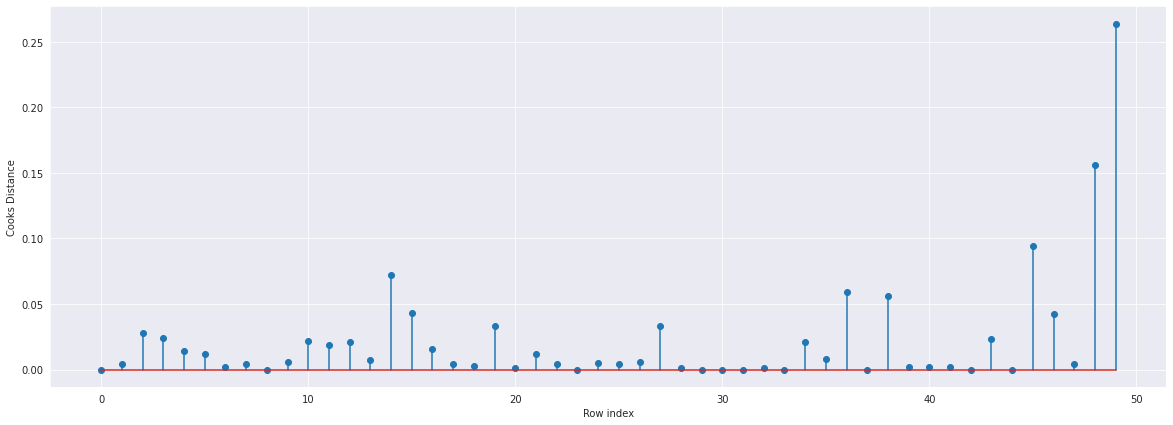

In [25]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2639594358699432)

## High Influence points

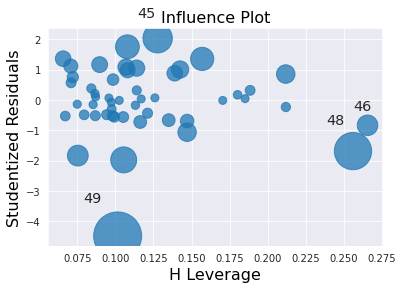

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [28]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [29]:
leverage_cutoff

0.36

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [30]:
cars[cars.index.isin([40, 46])]

,rd_spend,adminstration,marketing_spend,state,profit
40,28754.33,118546.05,172795.67,California,78239.91
46,1315.46,115816.21,297114.46,Florida,49490.75


In [31]:
#See the differences in HP and other variable values
cars.head()

,rd_spend,adminstration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [32]:
#Load the data
cars_new = pd.read_csv("/content/50_Startups.csv")

In [33]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[40,46]],axis=0).reset_index()

In [34]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [35]:
car1

,rd_spend,adminstration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [36]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('profit~adminstration+state+marketing_spend',data = car1).fit()

In [37]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.6849099600287032, 1106.511561714693)

In [39]:
#Exclude variable "VOL" and generate R-Squared and AIC values

final_ml_W= smf.ols('profit~rd_spend+state+marketing_spend',data = car1).fit()

In [40]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.9480598186114121, 1019.978806163041)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [41]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


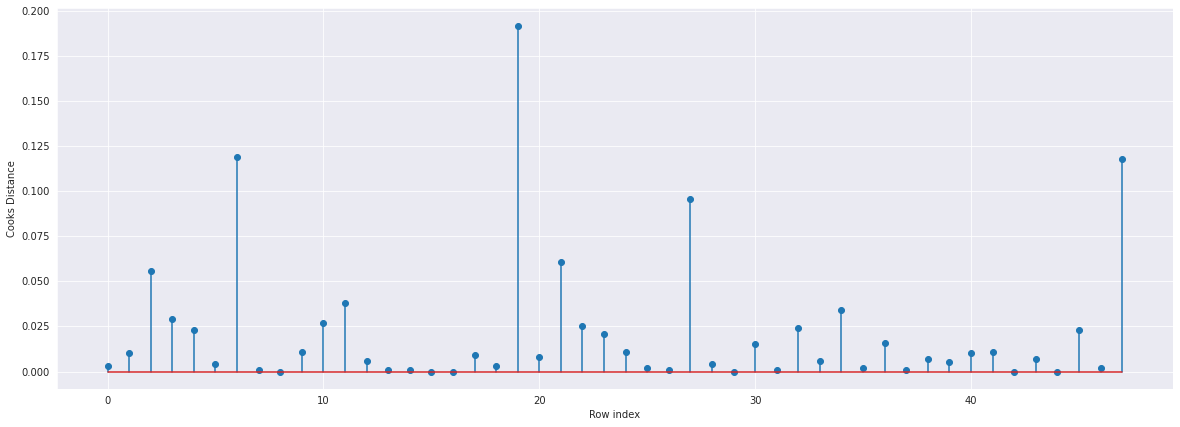

In [42]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [43]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(19, 0.19221123005181873)

In [44]:
#Drop 46 and 47 observations
car2=car1.drop(car1.index[[46,47]],axis=0)

In [45]:
car2

,rd_spend,adminstration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [46]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [47]:
car4=car3.drop(['index'],axis=1)

In [55]:
car4

,rd_spend,adminstration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [48]:
#Build the model on the new data
final_ml_V= smf.ols('profit~adminstration	+state+marketing_spend',data = car4).fit()

In [49]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


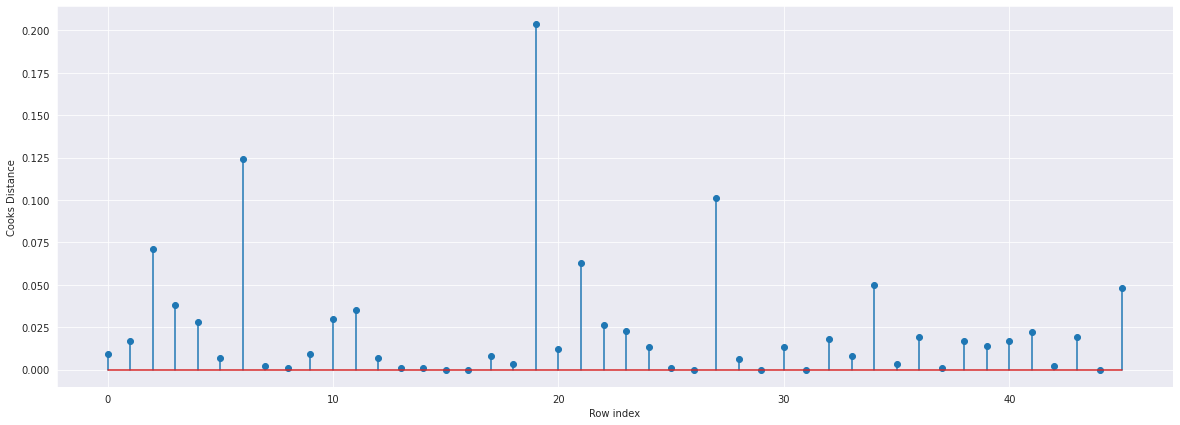

In [50]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [51]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(19, 0.20387668132154654)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [52]:
#Check the accuracy of the mode
final_ml_V= smf.ols('profit~adminstration	+state+marketing_spend',data = car4).fit()

In [53]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.6508859894227552, 1055.8044196625083)

## Predicting for new data

In [60]:
#New data for prediction
new_data=pd.DataFrame({'profit':40,"adminstration":95,"state":102,"marketing_spend":35},index=[1])

In [63]:
final_ml_V.predict


<bound method Results.predict of <statsmodels.regression.linear_model.OLSResults object at 0x7fbdd35e7190>>

In [65]:
(new_data)

,profit,adminstration,state,marketing_spend
1,40,95,102,35
